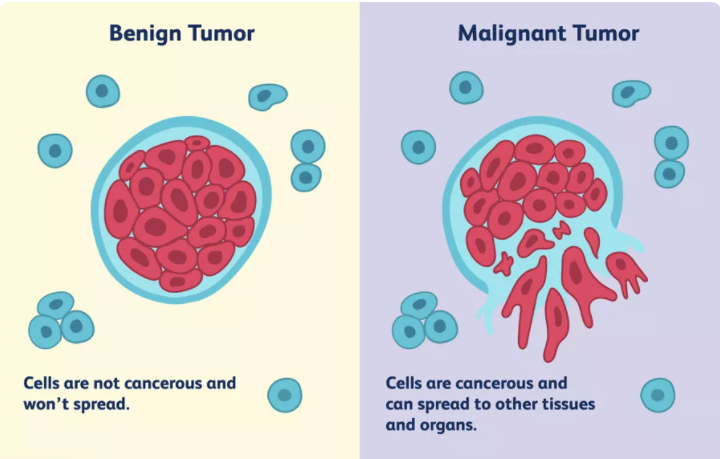

The circles are neurons


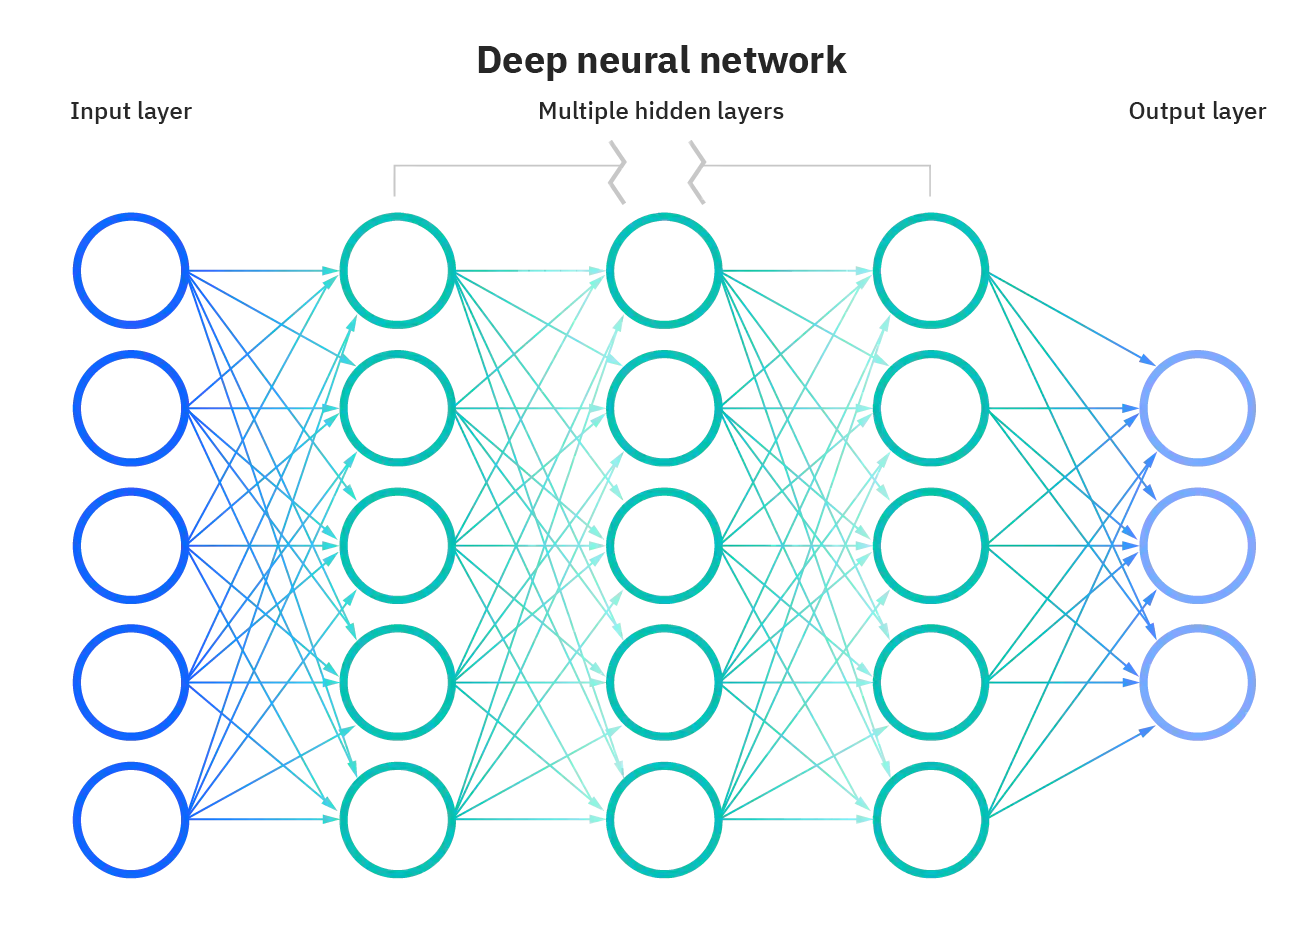


In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

#to create a neural network
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
data=load_breast_cancer()
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
print(data['data'])
data['data'].shape
#we have 539 rows and each row has 30 columns

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


(569, 30)

In [ ]:
#all columns

data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
#print features of all tumours

#eg-1.799e+01------->1.799x10^1


data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
#print features of one(first) breast cancer data
j=0
for i in data['feature_names']:
  print(i,':',data['data'][0][j])
  j+=1

mean radius : 17.99
mean texture : 10.38
mean perimeter : 122.8
mean area : 1001.0
mean smoothness : 0.1184
mean compactness : 0.2776
mean concavity : 0.3001
mean concave points : 0.1471
mean symmetry : 0.2419
mean fractal dimension : 0.07871
radius error : 1.095
texture error : 0.9053
perimeter error : 8.589
area error : 153.4
smoothness error : 0.006399
compactness error : 0.04904
concavity error : 0.05373
concave points error : 0.01587
symmetry error : 0.03003
fractal dimension error : 0.006193
worst radius : 25.38
worst texture : 17.33
worst perimeter : 184.6
worst area : 2019.0
worst smoothness : 0.1622
worst compactness : 0.6656
worst concavity : 0.7119
worst concave points : 0.2654
worst symmetry : 0.4601
worst fractal dimension : 0.1189


In [ ]:
#print features of next breast cancer data

j=0
for i in data['feature_names']:
  print(i,':',data['data'][1][j])
  j+=1

mean radius : 20.57
mean texture : 17.77
mean perimeter : 132.9
mean area : 1326.0
mean smoothness : 0.08474
mean compactness : 0.07864
mean concavity : 0.0869
mean concave points : 0.07017
mean symmetry : 0.1812
mean fractal dimension : 0.05667
radius error : 0.5435
texture error : 0.7339
perimeter error : 3.398
area error : 74.08
smoothness error : 0.005225
compactness error : 0.01308
concavity error : 0.0186
concave points error : 0.0134
symmetry error : 0.01389
fractal dimension error : 0.003532
worst radius : 24.99
worst texture : 23.41
worst perimeter : 158.8
worst area : 1956.0
worst smoothness : 0.1238
worst compactness : 0.1866
worst concavity : 0.2416
worst concave points : 0.186
worst symmetry : 0.275
worst fractal dimension : 0.08902


In [ ]:
#print data of last one
j=0
for i in data['feature_names']:
  print(i,':',data['data'][-1][j])
  j+=1

mean radius : 7.76
mean texture : 24.54
mean perimeter : 47.92
mean area : 181.0
mean smoothness : 0.05263
mean compactness : 0.04362
mean concavity : 0.0
mean concave points : 0.0
mean symmetry : 0.1587
mean fractal dimension : 0.05884
radius error : 0.3857
texture error : 1.428
perimeter error : 2.548
area error : 19.15
smoothness error : 0.007189
compactness error : 0.00466
concavity error : 0.0
concave points error : 0.0
symmetry error : 0.02676
fractal dimension error : 0.002783
worst radius : 9.456
worst texture : 30.37
worst perimeter : 59.16
worst area : 268.6
worst smoothness : 0.08996
worst compactness : 0.06444
worst concavity : 0.0
worst concave points : 0.0
worst symmetry : 0.2871
worst fractal dimension : 0.07039


In [ ]:
#target_names contains if melignant cancer or benign one
#melignant at 0th index and benign at 1st index
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
#target stores either 1 or 2 as value to tell if 0(melignant(cancerous)) or 1(benign(non-cancerous))

data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
#location where dataset is present

print(data['filename'])

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/breast_cancer.csv


In [ ]:
feature=data['data']
label=data['target']

In [ ]:
#the data is very discrete so we need to standardise all the data to work upon it
#we use sklearn.preprocessing import StandardScaler 
#earlier the data was varying hugely but after using this,the data would be very close to each other hence easy to use

scale=StandardScaler()
feature=scale.fit_transform(feature)
print(feature[0]) #processed features of first breast cancer data
print(label[0]) #label of first breast cancer data

print(data['target_names'][label[0]]) #corresponding target name(melignant/benign) for label(0/1) for first data
print(data['target_names'][label[101]]) #corresponding target name(melignant/benign) for label(0/1) for 101st data

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]
0
malignant
benign


In [ ]:
#AFTER PREPROCESSING THE DATA,WE TRAIN THE MODEL
#WE DIVIDE THE DATA INTO TRAINING(500 rows)(approx.80% OF DATA),VALIDATION(approx.10% OF DATA)(35 rows) and TESTING(34 rows)(approx.10% OF DATA)

print("total data size is:",feature.shape)

#taking first 500 data(features(30 features) and its label(0/1)) for TRAINING 
X_train=feature[:500]
Y_train=label[:500]
print('data took for TRAINING :',X_train.shape,Y_train.shape)

#taking next 35 data(features(30 features) and its label(0/1)) for VALIDATION 
X_val=feature[500:535]
Y_val=label[500:535]
print('data took for VALIDATION :',X_val.shape,Y_val.shape)

#taking next 34 data(features(30 features) and its label(0/1)) for TESTING 
X_test=feature[535:]
Y_test=label[535:]
print('data took for TESTING :',X_test.shape,Y_test.shape)

total data size is: (569, 30)
data took for TRAINING : (500, 30) (500,)
data took for VALIDATION : (35, 30) (35,)
data took for TESTING : (34, 30) (34,)


In [ ]:
model = Sequential()#sequential adds an empty neural network/empty stack so that we can start adding the layers(INPUT/HIDDEN/OUTPUT)


#adding the layers

#input layer is predefined so we add the hidden layers
#we need to take 30 values(30 features) and need 1 output(0/1 ie-melignant/benign)

#there are different types of activation function (here we use relu activation function)
#DENSE means a layer with all the neurons in 1-Dimension
model.add(Dense(32, activation = 'relu', input_dim = 30))#adding 32 neurons and input_dimension=30(30 input features)
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))

#we use sigmoid activation function for OUTPUT LAYER as it gives output between 0 and 1 so it would be easy to know if value is 0(melignant(cancerous)) or 1(benign(non-cancerous))
model.add(Dense(1, activation = 'sigmoid'))

#now we compile the model
#loss is the error(what we are predicting vs what the model has shown)/we use binary_crossentropy as it is a binary classification(0/1)/if we work on more than 2 classes we would use categorical_crossentropy
model.compile( loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])#optimiser will optimise/tune the weights(neurons)(there are a lot of optimisers but adam algorithm works best )
                                                                                          #metrics shows us the accuracy of the model(eg-0.97(97% accuracy),1.0(100% accuracy))

In [ ]:
#now we train the model with the data
# to fit the data in the model we use model.fit


#we give it the features of training data(X_train , Y_train)
'''EPOCH--when an ENTIRE dataset is passed forward and backward through the neural network only ONCE=1 epoch
          when an ENTIRE dataset is passed forward and backward through the neural network 100 times=100 epochs'''
#we define validation data to check the prediction done by the model(like taking exam to check how correct is the working)
#batch size-->number of training examples utilized in one iteration
model.fit( X_train , Y_train, epochs = 10, batch_size = 5, validation_data = (X_val, Y_val))

*Training accuracy doesnt matter much but validation accuracy must be good*

***We can change the hyperparameters like epochs,training data,we can add more hidden layer to tune/increase the accuracy of the model(we just have to play with the numbers in order to increase the accuracy***

**we can aslo the shuffle the data for better training and accuracy**

In [ ]:
model.evaluate(X_test , Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.2205 - accuracy: 0.9706


[0.22053760290145874, 0.970588207244873]

In [ ]:
model.evaluate(X_val , Y_val)

2/2 [==============================] - 0s 4ms/step - loss: 0.1979 - accuracy: 0.9714


[0.19793209433555603, 0.9714285731315613]

In [ ]:
for i in range(30):
  sample = X_test[i]
  sample = np.reshape(sample, (1,30))

  if (model.predict(sample)[0][0] > 0.5):
    print("-Benign")
  else:
    print("-Malignant")

  if (Y_test[i] == 1):
    print("*Banign")
  else:
    print("*Melignant")
  print("-----------")

-Malignant
*Melignant
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Malignant
*Melignant
-----------
-Malignant
*Melignant
-----------


In [ ]:

t = 0
for i in Y_val:
  if (i == 1):
    t += 1

print(t)

26


In [ ]:
t = 0
for i in Y_test:
  if (i == 1):
    t += 1

print(t)

26


In [ ]:
X_test[0] * -.1


array([-0.18241403, -0.03654313, -0.18877867, -0.18575144, -0.05863832,
       -0.13182463, -0.15028386, -0.21481449, -0.11514395,  0.00407717,
       -0.10590431,  0.04114087, -0.0910827 , -0.10438254,  0.08210263,
       -0.00381089, -0.02704381, -0.03915519,  0.01286215,  0.04183096,
       -0.16630405,  0.00321166, -0.15768262, -0.16320758,  0.02441043,
       -0.03768171, -0.08209115, -0.15256103, -0.02851246,  0.04575029])